# Сборный проект для курса Я.Практикум: Исследование игрового рынка для интернет-магазина «Стримчик».


## Цель проекта: 

### Выявление закономерностей, влияющих на успешность игры на рынке с целью эффективного планирования маркетинговой стратегии на 2017 год.


### Создание портрета пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Проверка гипотез:
- Верно ли, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы?
- Верно ли, что средние пользовательские рейтинги жанров Action и Sports разные?


## Данные: 

Представленный заказчиком датасет:

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)


## План исследования:

1. [Загрузка данных](#load) 
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных согласно целям проекта](#research)
4. [Портрет пользователя каждого региона](#portrait)
5. [Проверка гипотез](#hypothesis)
6. [Общие выводы](#conclusion)

In [1]:
#Импортируем нужные библиотеки
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

#### Шаг 1. Загрузка данных
<a id='load'></a>

In [2]:
#Открываем файлы
try:
    df = pd.read_csv('/datasets/games.csv')

except:
    df = pd.read_csv('games.csv')

In [3]:
#Изучим общую информацию и посмотрим первые строки
def data_description(df):
    '''функция для вывода данных о датасете -info, describe, первые 5 строк, количество и процент явных дубликатов'''
    result = display(df.info()), display(df.describe()), display(df.head()), 
    display('Количество явных дубликатов:', df.duplicated().sum()),
    display('Процент явных дубликатов:', round((df.duplicated().sum()/len(df))*100, 2))
    return result

display('Информация о данных')
data_description(df)

'Информация о данных'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


'Количество явных дубликатов:'

0

'Процент явных дубликатов:'

0.0

(None, None, None)

##### Выводы

- В данных есть пропуски, особенно значительно количество в столбцах Critic_Score, User_Score и Rating
- Выбивающиеся числовые значения (неадекватный год или количество проданных копий, отрицательные оценки или оценки, превышающие возможные максимальные значения) не наблюдаются 
- В названиях колонок есть стилистические ошибки
- В некоторых столбцах требуется изменение типа данных для дальнейших расчетов
- Набор данных достаточен для целей исследования

#### Шаг 2. Предобработка данных
<a id='preprocessing'></a>

In [4]:
#Приведем названия столбцов к единому стилю
df.columns = df.columns.str.lower()
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


Для дальнейших расчетов и удобного отображения на графиках требуется изменение типов данных в некоторых столбцах. При изменении нам будут мешать пропуски, поэтому для начала займемся ими.

In [6]:
#Считаем количество пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Восстановить такие данные, как название игры, год выпуска и жанр мы не можем, заполнить их значениями также не представляется возможным. Таких данных немного, поэтому предлагается удалить такие строки. 

In [7]:
#Удалим строки с отсутствующими названиями игр, жанров и годом выпуска
df = df.dropna(subset=['name']).reset_index(drop=True)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df = df.dropna(subset=['genre']).reset_index(drop=True)

In [8]:
#Посмотрим на вариативность значений
display('Уникальные значения столбца Оценки критиков: ', df['critic_score'].unique())
display('Уникальные значения столбца Оценки пользователей: ', df['user_score'].unique())
display('Уникальные значения столбца Рейтинг: ', df['rating'].unique())

'Уникальные значения столбца Оценки критиков: '

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

'Уникальные значения столбца Оценки пользователей: '

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'Уникальные значения столбца Рейтинг: '

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце Оценки пользователей есть значение, которое в дальнейшем будет мешать нам в расчетах, т.к, не является числовым, это "tbd". Расшифровывается как To Be Determined, то есть «Будет определено». По сути, для нас это тот же пропуск в данных.

Уникальные значения стобца Рейтинг говорят о том, что в нем тоже есть что поправить, вернемся к этому позже.

In [9]:
#Заменим tbd на NaN и проверим результат
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Что касается строк с отсутствующими значениями оценок критиков, пользователей, а также рейтинга - их слишком много, чтобы пренебрегать ими, но и заполнение средними значениями в зависимости от количества продаж или, например, жанра было бы некорректно - это исказит результаты исследования. Строки должны остаться, но при этом не мешать нам в расчетах и при построении графиков своими пустыми значениями. Предлагается заменить пустоты на сильно выделяющиеся значения - мы будем точно знать, что это неправда, но и работать это не помешает. 

В столбцах с числовыми значениями (оценки критиков и пользователей) используем отрицательное значение, не сильно отличающееся от возможных значений, чтобы при построении графиков, они выглядели адекватно и не искажали масштаб. Заполним пропуски значением "-1".
В столбце rating заменим пропуски на понятное нам значение "неизвестно" (unknown)

In [10]:
#В столбцах с числовыми значениями заменим пропуски на -1
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

#В столбце с категориальными переменными заменим пропуски на unknown
df['rating'] = df['rating'].fillna('unknown')

#Проверим результаты
display(df.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Теперь, когда пропуски нам не мешают, вернемся к вопросу с изменением типов данных. 

Год выпуска - в датасете фигурирует как дробное значение, можем привести целочисленному.

Оценка критиков - в датасете представлено как дробное значение, но присутствуют только целые, приведем к целочисленному типу.

Оценка пользователей - датасет предлагает тип object (вероятно из-за изначального наличия в столбце нечисловых данных), но это дробные значения, приведем к соответствующему типу.

Все эти преобразования мы делаем для удобства дальнейших расчетов и лаконичности отображения значений на графиках.

Можно также уменьшить размерность типов данных для экономии места и ускорения работы кода, но такой цели у нас нет - датасет небольшой (и мне пока очень страшно это делать), эти действия излишни.

In [11]:
#Преобразуем типы данных
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Ранее мы рассмотрели уникальные значения столбца Рейтинг и заметили несоответствия.

Например, тип K-A использовался в ESRB до 1998 года, после чего был переименован в E. 

Тип RP означает, что таким играм еще не присвоен окончательный рейтинг ESRB. Возможно, для людей, занимающихся категоризацией игр по возрасту этот показатель важен, как часть процесса комплекса работ по присваиванию рейтинга, но для нашего исследования эта категория по сути означает неизвестный тип - unknown. Наличие рейтинга RP в строке не даст нам ничего полезного, только покажет еще один "неизвестный" тип рейтинга.

Исправим данные - это уменьшит количество категорий рейтингов и сделает наш анализ точнее.

In [12]:
#Заменим устаревший рейтинг K-A на Е и неизвестный рейтинг RP на unknown
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'RP', 'rating'] = 'unknown'
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


None

Теперь внимательнее посмотрим на другие нечисловые столбцы датасета.

In [14]:
display('Количество уникальных названий игр: ', df['name'].value_counts())
display('Количество уникальных платформ: ', df['platform'].value_counts())
display('Количество уникальных жанров игр: ', df['genre'].value_counts())

'Количество уникальных названий игр: '

Need for Speed: Most Wanted         12
FIFA 14                              9
Ratatouille                          9
LEGO Marvel Super Heroes             9
Madden NFL 08                        8
                                    ..
Starry ? Sky: In Winter              1
The Flintstones: Bedrock Bowling     1
Guild Wars 2                         1
The Misadventures of Tron Bonne      1
Kirby & the Amazing Mirror           1
Name: name, Length: 11426, dtype: int64

'Количество уникальных платформ: '

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

'Количество уникальных жанров игр: '

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Списки уникальных значений платформ и жанров не вызывает вопросов, а в наименованиях игр очень много одинаковых значений. Посмотрим, чем отличаются отличаются строки.

In [15]:
display(df.query('name == "Need for Speed: Most Wanted"'))
display(df.query('name == "FIFA 14"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
252,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
519,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,-1,-1.0,unknown
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1976,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2025,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,-1,-1.0,unknown
3531,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6177,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,-1,-1.0,unknown
6310,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E
270,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84,4.2,E
466,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87,6.3,E
1733,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88,5.8,E
4634,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,-1,1.8,E
4743,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87,4.6,E
4915,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,-1,4.3,E
6765,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,-1,-1.0,unknown
7751,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,-1,3.4,E


Ответ получен - в строках с играми с одинаковыми названиями указаны разные платформы и годы выпуска. Даже если название и платформа совпадают, отличается год - это особенности индустрии, наиболее выдающуюся игру могут перевыпустить несколько лет спустя под тем же именем, но, например, с улучшенной графикой.

Проведем проверку на неявные дубликаты. Сравним, есть ли совпадения по платформе, году выпуска и наименованию игры.

In [16]:
#Проверяем неявные дубликаты
display(df[df.duplicated(subset=['name', 'platform', 'year_of_release'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


In [17]:
df.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Найден один дубликат. Повторяющуюся строку нужно удалить, при этом сохранив продажи, попавшие в дубликат.

In [18]:
#Сложим продажи, удалим дубликат
df.loc[600, "eu_sales"] += 0.01
df = df.drop(index=15969)
df.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83,5.5,E


Добавим в наш датафрейм столбец с суммарными продажами всех регионов.

In [19]:
#Добавляем столбец total_sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


##### Выводы

- Удалено незначительное для исследования количество строк с пропусками в названии игры, годе выпуска и жанре, т.к. восстановить или чем-то их заполнить не представляется возможным. Также удалили один неявный дубликат. Причинами пропусков может служить человеческий фактор, если что-то заполнялось вручную или отсутствие информации на момент сбора данных - еще не было выбрано официальное название (нет названия), игра еще не была выпущена (нет года), игре еще не был официально присвоен жанр (нет жанра). Не стоит исключать также технический фактор, хотя он кажется наименее вероятным. Склоняюсь к варианту с простым отсутствием данных в первоначальных источниках.
- Те же причины возможны и в случае с пропусками в столбцах Critic_Score, User_Score и Rating, но здесь добавляется дополнительный фактор - разные системы оценок в разных странах, отсутствие данных по регионам, а также само существование какой бы то ни было системы оценок на момент выхода игры. Или обратная ситуация - игра совсем новая и еще не была оценена игроками и критиками. Отсутствующие значения здесь были заменены на "-1", что теперь является для нас маркером, что данных нет, но их отсутствие не мешает расчетам и построению графиков.
- В столбце User_Score значение tbd (To Be Determined, то есть «Будет определено») для нас это по сути такой же пропуск в данных.
- В столбце rating заменили пропуски на понятное нам значение "неизвестно" (unknown).
- Сократили количество категорий возрастного рейтинга - устаревшее название исправили на новое, неприсвоенный рейтинг исправили на unknown.
- В названиях колонок исправлены стилистические ошибки (приведено к нижнему регистру).
- Для дальнейших расчетов в некоторых столбцах проведено изменение типа данных. 
- Добавили в датафрейм столбец с суммарными продажами всех регионов.
- Данные подготовлены к дальнейшему анализу

#### Шаг 3. Исследовательский анализ данных
<a id='research'></a>

##### Выпуск игр по годам

Посмотрим, сколько игр выпускалось в разные годы.

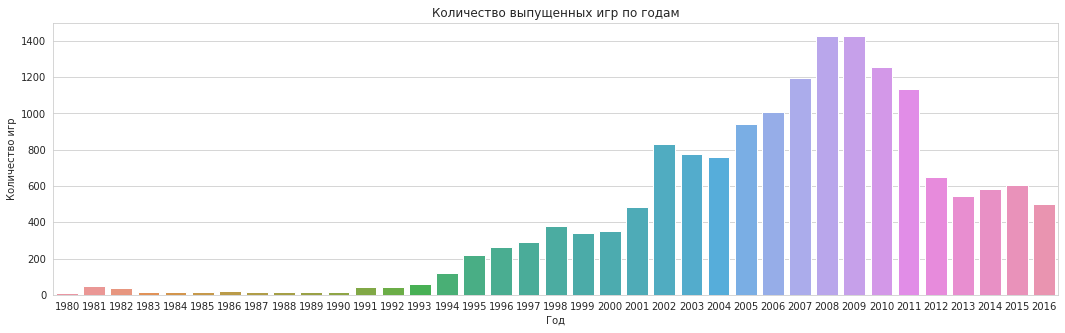

In [20]:
#Построим график
sns.set_style('whitegrid')
plt.figure(figsize=(18,5))
sns.countplot(data = df, x = 'year_of_release');
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

В имеющихся у нас данных с 1980 года по 2016 мы видим ежегодный рост числа выпущенных игр вплоть до начала 2010 года. В начале 2000-х наблюдался взрывной рост индустрии - интерес к играм возрастал, аудитория расширялась, на рынок выпускалось множество продуктов. С начала 2010 года рост остановился и уже с 2012 ежегодный выпуск стабилизировался на уровне 500-650 игр. Вряд ли это связано с потерей интереса, скорее это можно объяснить другими причинами:
- Влияние экономического кризиса 2008 года (банкроство компаний).
- Эволюция технологий - игры становились объемнее, сложнее (в техническом плане), разработка стала занимать всё больше времени, студиям становилось все сложнее тянуть большие затраты.

##### Продажи по платформам

Рассмотрим, как менялись продажи по платформам.

In [21]:
#Выделим платформы с наиболее высокими суммарными результатами продаж
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                                                   ascending=False)
platform_sales.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем первые шесть позиций топа, т.к. результат по продажам следующей платформы (PS4) отличается уже слишком сильно - более чем в два раза от предыдущей позиции.

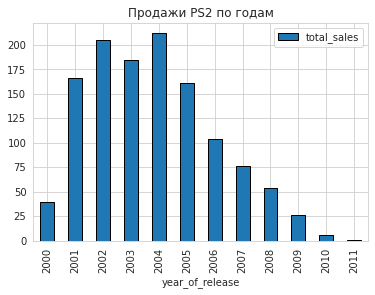

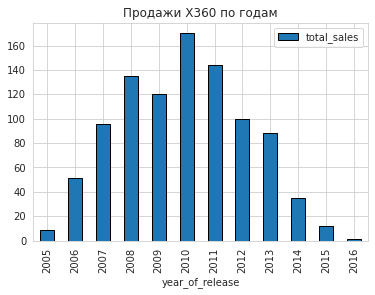

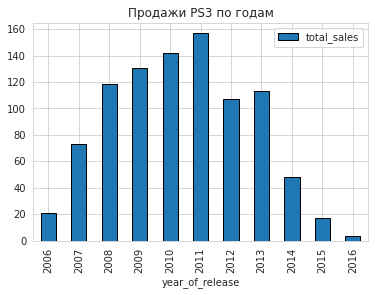

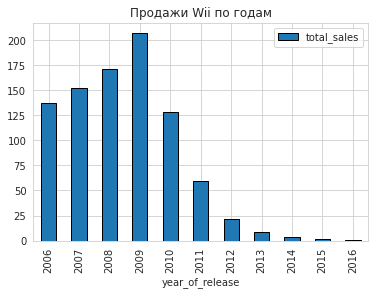

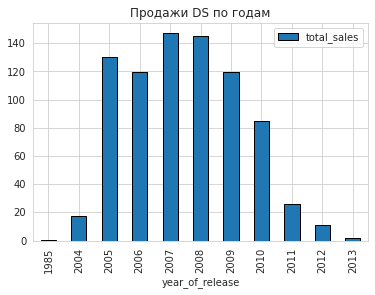

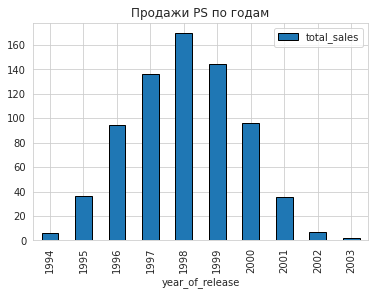

In [22]:
#Построим гистограммы с распределением продаж самых популярных платформ по годам
popular_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform in popular_platforms:
    df.query('platform ==@platform').groupby('year_of_release').agg({'total_sales':'sum'}).plot(kind='bar', 
                                                                                                ec='black', 
                                                                                                title='Продажи ' 
                                                                                                + platform + ' по годам')

Гистограммы показывают, что пики продаж: 

- PS2 приходились на 2004 год, 
- X360 приходились на 2010 год, 
- PS3 приходились на 2011 год, 
- Wii приходились на 2009 год, 
- DS приходились на 2007 год, 
- PS приходились на 1998 год

Платформы остаются популярными не более 5-7 лет подряд, при этом пик никогда не приходится на первый год - вероятно, это объясняется зависимостью от выхода игр и временем, необходимым для их адаптации к платформам.

##### Срок появления и исчезновения платформ

Рассчитаем, за какой характерный срок появляются новые и исчезают старые платформы. Назовем это жизненным циклом платформы.

In [23]:
#Рассчитаем среднее значение жизненного цикла платформы

life_cycle_years = []
for platform in popular_platforms:
    life_cycle = df.query('platform == @platform').pivot_table(index='year_of_release', 
                                                               values='total_sales', 
                                                               aggfunc='sum').count()
    life_cycle_years.append(life_cycle)
platforms_life_cycle = int(np.mean(life_cycle_years))
display('Средний жизненный цикл платформы, в годах: ', platforms_life_cycle)

'Средний жизненный цикл платформы, в годах: '

11

##### Определяем период для исследования

Для дальнейших исследований нам необходимо **определить период, на основании которого мы будем строить прогноз на 2017 год**. Игровая индустрия очень быстро меняется и брать в расчет очень старые данные будет неверно. 

Ранее мы рассматривали, как менялись продажи игр по годам и видели серьезный спад после кризиса 2008 года, стоит принять это во внимание. Определяем период как минимум после 2010 года - время, когда рынок перестал расти, после кризиса уменьшилось количество студий, были пересмотрены процессы разработки, потребители сформировали запрос на определенное качество контента и индустрия вышла на стабильное количество выпускаемых продуктов. 

Мы также должны учесть срок жизни игровых платформ, наши расчеты показали, что речь идет об 11 годах в среднем. 

Пик популярности игровых платформ (5-7 лет) также сужает период, который нам будет интересно рассматривать.

В связи с этими наблюдениями, для цели нашего исследования предлагается отталкиваться от данных не ранее 2012 года. Далее в работе будем использовать только этот период.

##### Выбор потенциально прибыльных платформ

In [24]:
#Создадим новый датафрейм с данным с 2012 года

df_new = df.query('year_of_release >=2012')
df_new.head().sort_values(by ='year_of_release', ascending=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63


In [25]:
#Посмотрим на продажи по платформам по годам в новом датафрейме
platform_sales_new = df_new.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'})
platform_sales_new

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2012                   11.01
         2013                    1.54
PC       2012                   23.22
         2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2012                    7.69
         2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

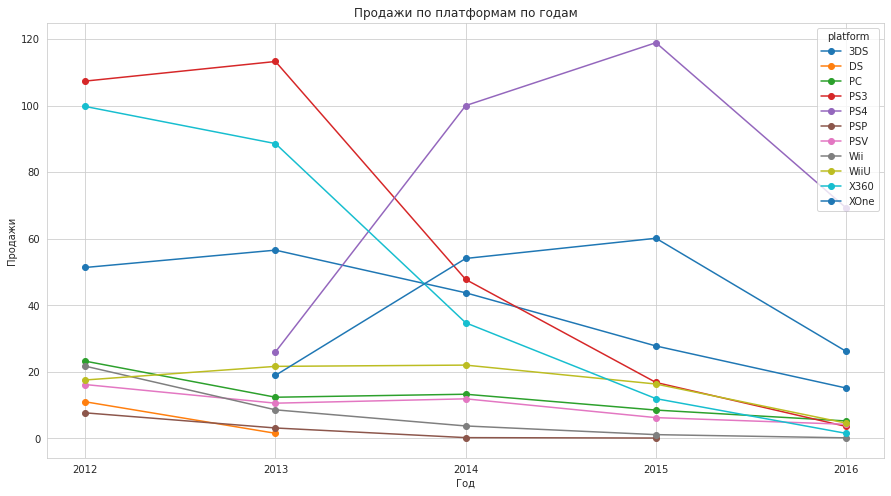

In [26]:
#Визуализируем полученную информацию

df_new.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', 
                   aggfunc='sum').plot(grid=True, style='o-', figsize=(15, 8))
plt.title('Продажи по платформам по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.xticks(range(2012, 2017))
plt.show()

Все рассмотренные платформы имеют тенденцию к спаду продаж к моменту наблюдения. **Потенциально интересные для нас платформы**, сохраняющие высокий уровень продаж, несмотря на тенденцию к снижению - **PS4 и XOne**. 

Еще две платформы могут рассматриваться как **дополнительные варианты для расширения рекламной кампании**, т.к. отличаются от лидеров по принципу использования - **3DS среди лидеров является единственной портативной приставкой**, а **PC - портативный компьютер**, совершенно отдельный тип. 

Прочие рассмотренные платформы на 2016 год имеют низкий уровень продаж игр - менее 5 млн копий в год.

Рассмотрим размах по продажам по четырем выбранным платформам.

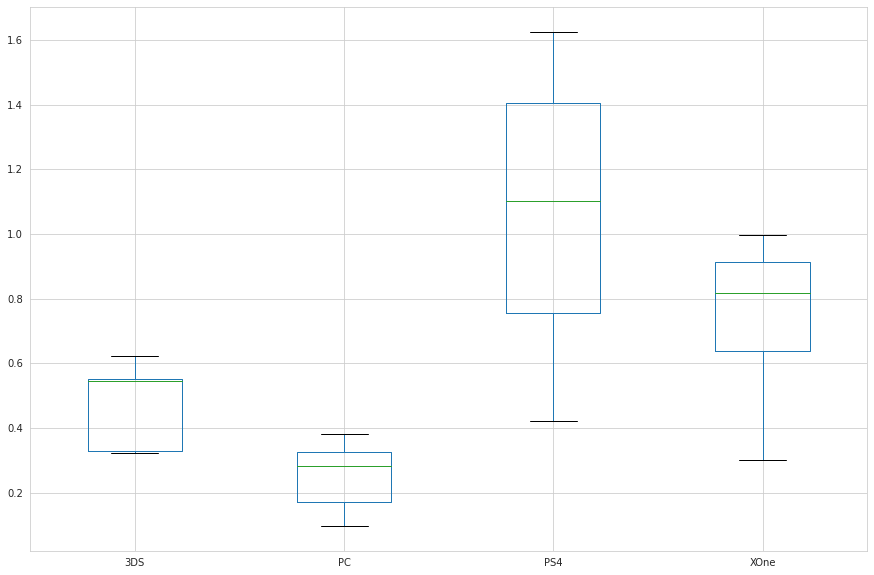

In [27]:
#Отберем в отдельный датафрейм 4 выбранные платформы
df_new_top = df_new.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "PC" ')

#Рассмотрим диаграмму размаха по продажам игр по потенциально прибыльным платформам
df_new_top.pivot_table(index='year_of_release', columns = 'platform', values='total_sales').boxplot(figsize=(15,10));

Диаграмма размаха показала, что платформа, с самыми низкими из выбранных платформ продажами - PC - имеет самые узкие границы медианных значений. 

Лидер по продажам - PS4 имеет самую широкую границу значений, т.е. в диапазон попадает большее количество нормальных значений. Это объяснимо за счет продолжительного высокого уровня продаж и серьезных колебаний в количестве проданных копий за разные периоды наблюдений.

XOne и 3DS имеют сопоставимые по размеру границы значений. У 3DS границы уже. На предыдущем графике мы также это наблюдали - продажи XOne за время наблюдения колебались сильнее, чем 3DS. 
Интересная особенность 3DS - медианное значение расположено очень близко к 75-му процентилю, это значит, что медиана уровня продаж 3DS смещена к большим значениям.

##### Влияние отзывов критиков и пользователей на продажи игр для самой популярной платформы

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

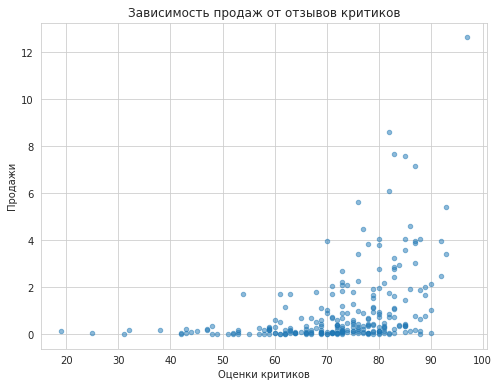

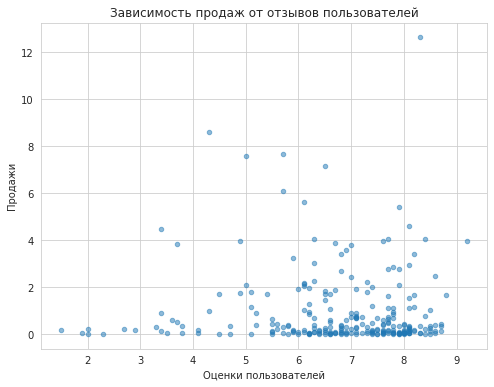

'Корреляция между уровнем продаж и оценками критиков: '

0.41

'Корреляция между уровнем продаж и оценками пользователей: '

-0.03

In [28]:
#Построим диаграммы рассеяния
df_new_top_scores = df_new.query('platform == "PS4" and critic_score !=-1 and user_score!=-1')

df_new_top_scores.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,6), grid=True)
plt.title('Зависимость продаж от отзывов критиков')
plt.ylabel('Продажи')
plt.xlabel('Оценки критиков')
plt.show()

df_new_top_scores.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,6), grid=True)
plt.title('Зависимость продаж от отзывов пользователей')
plt.ylabel('Продажи')
plt.xlabel('Оценки пользователей')
plt.show()

#Посчитаем корреляцию между отзывами и продажами
display('Корреляция между уровнем продаж и оценками критиков: ', 
        round(df_new_top_scores['total_sales'].corr(df_new_top_scores['critic_score']),2))
display('Корреляция между уровнем продаж и оценками пользователей: ', 
        round(df_new_top_scores['total_sales'].corr(df_new_top_scores['user_score']),2))

Диаграммы рассеяния и коэффициенты корреляции показали, что есть прямая взаимосвязь между продажами и оценками критиков,  выражена она средне. 

Коэффициент корреляции между уровнем продаж и оценками пользователей близок к нулю.

Мнение критиков оказывает более сильное воздействие на продажи, чем отзывы пользователей. Помимо психоголических эффектов, это можно объяснить тем, что критики оценивают игру зачастую раньше, чем пользователи - им предоставляют копии игр на раннем доступе или дают бесплатные версии непосредственно перед выходом игр, чтобы к моменту релиза, аудитория уже была заинтересована в покупке не только прямой рекламной кампанией, но и статьями и стримами экспертов (критиков).

Проверим, подтверждается ли такая связь на других платформах, актуальных на 2016 год.

##### Влияние отзывов критиков на продажи игр для других актуальных платформ

In [29]:
#Посмотрим на коэффициенты корреляции по другим платформам
platforms = ['PS3', 'X360', '3DS', 'XOne', 'WiiU', 'Wii', 'PC','PSV']
for platform in platforms:
    df_new_critic_scores = df_new.query('platform == @platform and critic_score !=-1 and user_score !=-1')
    display('Корреляция между уровнем продаж игр на ' + platform + ' и оценками критиков: ', 
        round(df_new_critic_scores['total_sales'].corr(df_new_critic_scores['critic_score']),2))

'Корреляция между уровнем продаж игр на PS3 и оценками критиков: '

0.33

'Корреляция между уровнем продаж игр на X360 и оценками критиков: '

0.36

'Корреляция между уровнем продаж игр на 3DS и оценками критиков: '

0.31

'Корреляция между уровнем продаж игр на XOne и оценками критиков: '

0.41

'Корреляция между уровнем продаж игр на WiiU и оценками критиков: '

0.35

'Корреляция между уровнем продаж игр на Wii и оценками критиков: '

-0.42

'Корреляция между уровнем продаж игр на PC и оценками критиков: '

0.24

'Корреляция между уровнем продаж игр на PSV и оценками критиков: '

0.09

Связь между оценками критиков и продажами игр подтверждается почти на всех платформах, кроме Wii и PSV. Посмотрим на графики рассеяния и заодно проверим, в чем может быть дело.

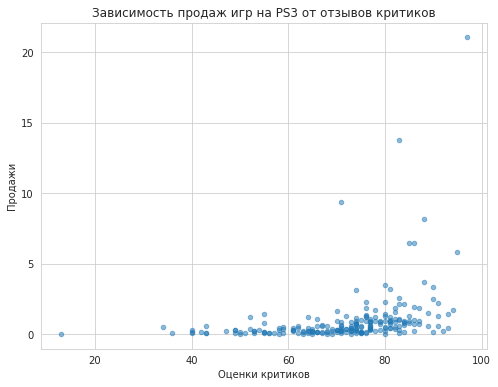

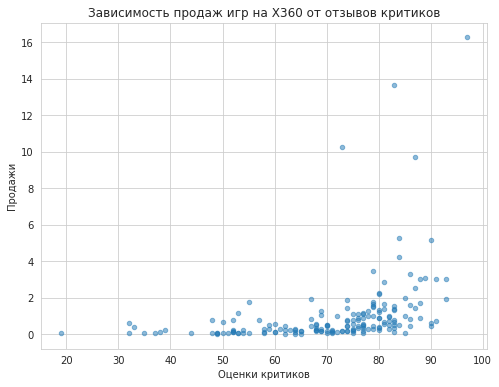

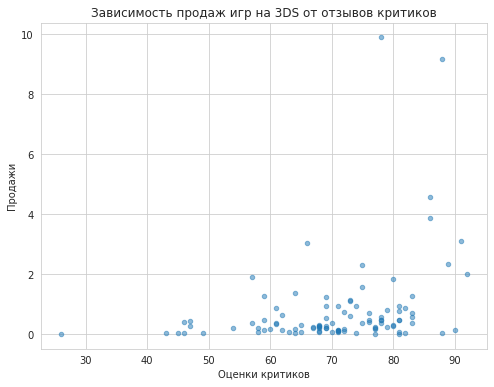

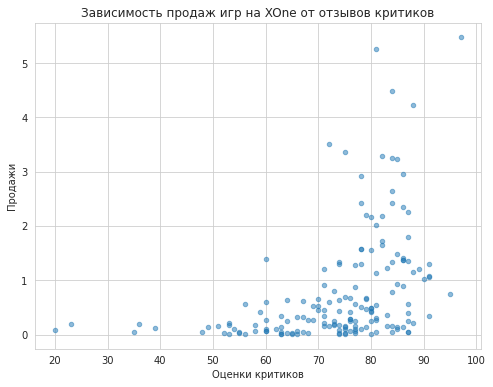

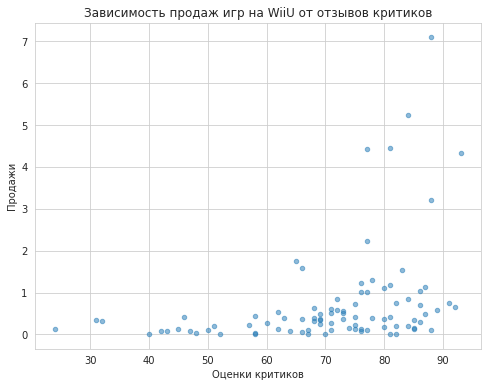

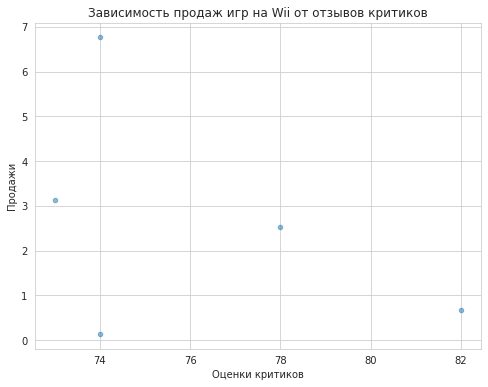

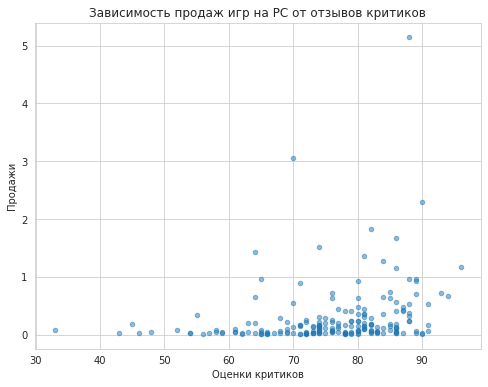

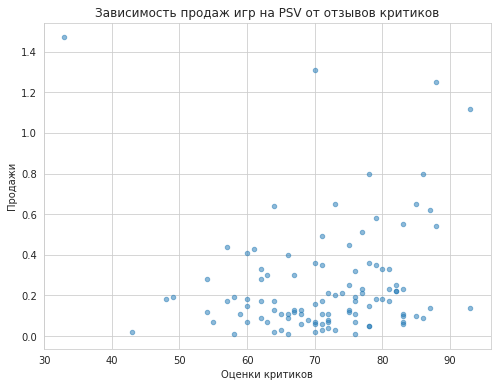

In [30]:
#Построим графики рассеяния
for platform in platforms:
    df_new_critic_scores = df_new.query('platform == @platform and critic_score !=-1 and user_score !=-1')
    df_new_critic_scores.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,6), grid=True)
    plt.title('Зависимость продаж игр на ' + platform + ' от отзывов критиков')
    plt.ylabel('Продажи')
    plt.xlabel('Оценки критиков')
    plt.show()

Причина отрицательного коэффициента корреляции между продажами игр и оценками критиков по платформе Wii и несопоставимо низким (по сравнению с другими) коэффициентом по платформе PSV связаны с малочисленностью данных.

Считаю, что можно утверждать, что оценка критиков - важный показатель, влияющий на уровень продаж игр и на него нужно обращать внимание при планировании рекламной кампании на будущий год.

Посмотрим, как обстоят дела с оценками пользователей.

##### Влияние отзывов  пользователей на продажи игр для других актуальных платформ

In [31]:
#Посмотрим на коэффициенты корреляции по актуальным платформам
for platform in platforms:
    df_new_user_scores = df_new.query('platform == @platform and critic_score !=-1 and user_score !=-1')
    display('Корреляция между уровнем продаж игр на ' + platform + ' и оценками пользователей: ', 
        round(df_new_user_scores['total_sales'].corr(df_new_user_scores['user_score']),2))

'Корреляция между уровнем продаж игр на PS3 и оценками пользователей: '

0.0

'Корреляция между уровнем продаж игр на X360 и оценками пользователей: '

-0.0

'Корреляция между уровнем продаж игр на 3DS и оценками пользователей: '

0.2

'Корреляция между уровнем продаж игр на XOne и оценками пользователей: '

-0.09

'Корреляция между уровнем продаж игр на WiiU и оценками пользователей: '

0.39

'Корреляция между уровнем продаж игр на Wii и оценками пользователей: '

0.01

'Корреляция между уровнем продаж игр на PC и оценками пользователей: '

-0.14

'Корреляция между уровнем продаж игр на PSV и оценками пользователей: '

0.01

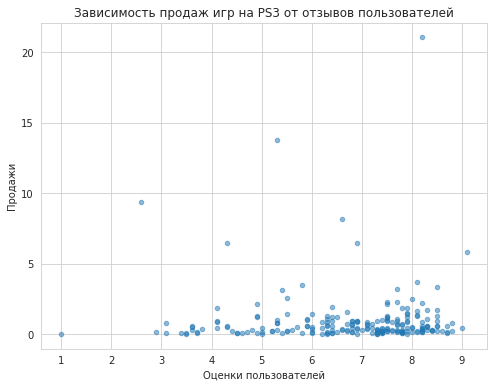

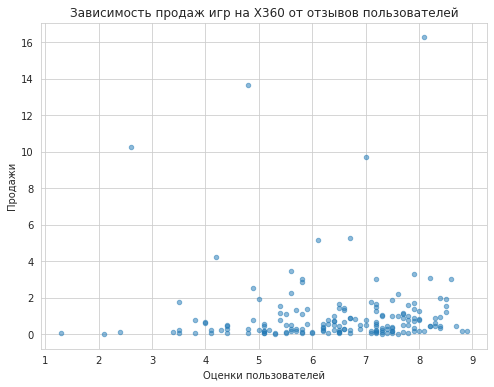

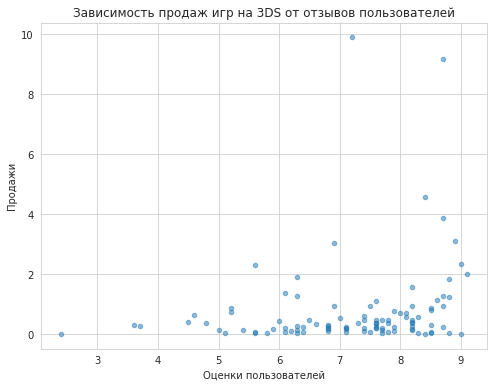

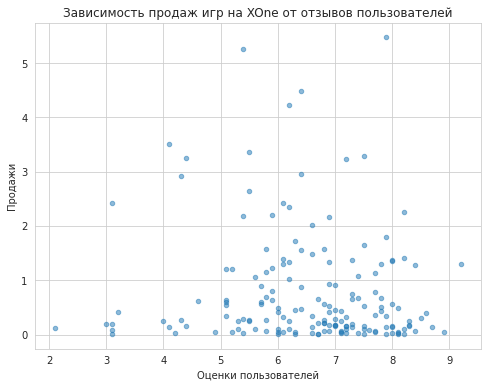

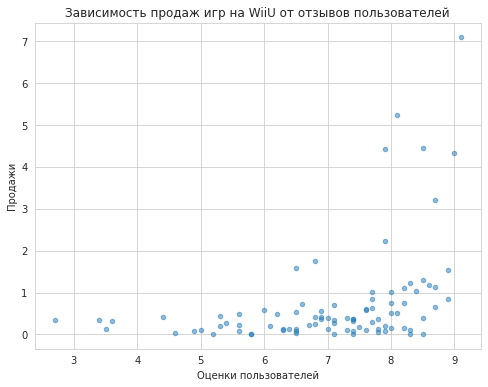

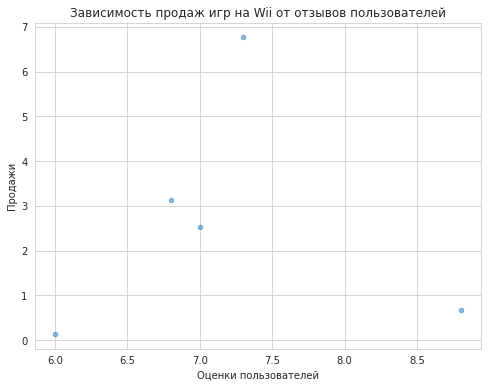

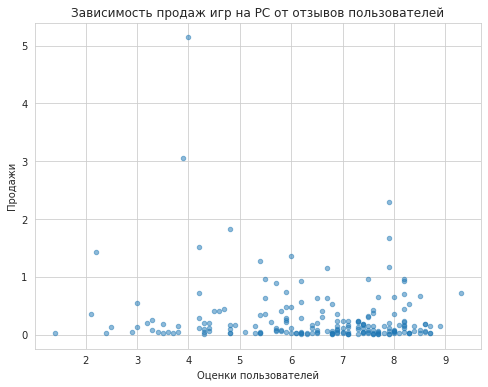

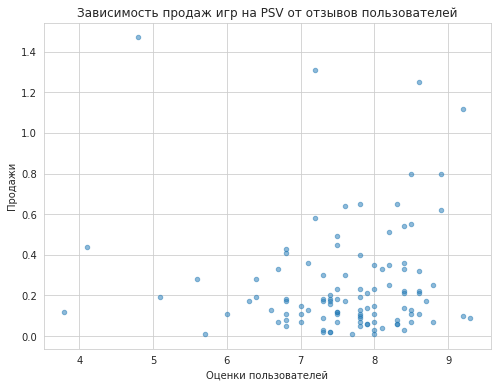

In [32]:
#Построим графики рассеяния
for platform in platforms:
    df_new_user_scores = df_new.query('platform == @platform and critic_score !=-1 and user_score !=-1')
    df_new_user_scores.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,6), grid=True)
    plt.title('Зависимость продаж игр на ' + platform + ' от отзывов пользователей')
    plt.ylabel('Продажи')
    plt.xlabel('Оценки пользователей')
    plt.show()

Корреляция между уровнем продаж игр и отзывами покупателей по другим платформам также стремится к нулю, как и в рассмотренном ранее случаем с самой популярной платформой PS4. Только две платформы выбиваются из общей картины - WiiU и, в меньшей степени 3DS. Ранее мы выбрали 3DS как дополнительную платформу для нашей маркетинговой стратегии на будущий год. Возможно, именно для этой платформы стоит обращать внимание на отзывы покупателей. Хотя влияние мнения критиков на продажи все равно значительнее.

##### Распределение игр по жанрам

'Количество выпущенных игр по жанрам: '

Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

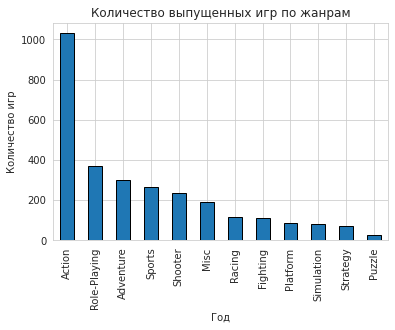

In [33]:
#Посмотрим на количество игр по жанрам
display('Количество выпущенных игр по жанрам: ', df_new['genre'].value_counts())
df_new['genre'].value_counts().plot.bar(ec='black');
plt.title('Количество выпущенных игр по жанрам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Лидер с большим отрывом - игры в жанре Action. В ТОП-5 также попали игры Role-Playing, Adventure, Sports и Shooter. На последнем месте по количеству игр - жанр Puzzle.

In [34]:
#Рассмотрим наиболее прибыльные жанры игр
genre_sales_new = df_new.groupby(['genre']).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
genre_sales_new

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


В ТОП-5 по количеству проданных копий попали игры в жанрах Action, Shooter, Role-Playing, Sports и Misc. 

Замыкает список жанр Puzzle.

Примечательно, что жанр Adventure, входящий в ТОП-5 по количеству выпущенных игр, занимает только десятое место по продажам. 

Рассмотрим внимательнее полученный ТОП-5 на предмет распределения уровня продаж.

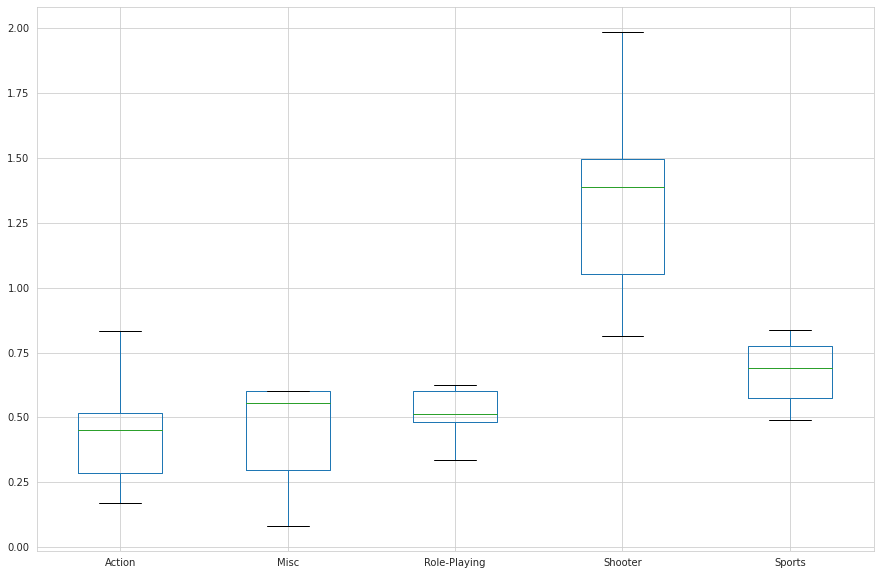

In [35]:
#Отберем в отдельный датафрейм ТОП-5 игровых жанров
df_new_top_genre = df_new.query('genre == "Action" or genre == "Shooter" or genre == "Role-Playing" or genre == "Sports" or genre == "Misc" ')

#Рассмотрим диаграмму размаха по продажам игр по жанрам
df_new_top_genre.pivot_table(index='year_of_release', columns = 'genre', values='total_sales').boxplot(figsize=(15,10));

##### Выводы

- Рассмотрены данные с 1980 года по 2016.

- Наблюдается ежегодный рост числа выпущенных игр вплоть до начала 2010 года. С начала 2010 года рост остановился, с 2011 ежегодный выпуск стабилизировался на уровне 500-650 игр.

- Наиболее популярная за всремя время исследований платформа - PS2, но на момент исследования она уже неактуальна.

- Платформы остаются популярными не более 5-7 лет подряд.

- Средний жизненный цикл платформы 11 лет.

- Определен период, на основании которого строится прогноз на 2017 год - это период с 2012 по 2016 г. Диапазон взят с учетом срока популярности платформ, среднего жизненного цикла платформ, устаревшие данные намеренно отрезаны, т.к. в условиях столь динамично меняющейся сферы, опираться на них было бы некорректно. Дальнейшие выводы сделаны на основании отобранных данных.

- **Потенциально интересные для нас платформы на 2017 год**, сохраняющие высокий уровень продаж, несмотря на тенденцию к снижению - **PS4 и XOne**. Еще две платформы могут рассматриваться как **дополнительные варианты для расширения рекламной кампании**, т.к. отличаются от лидеров по принципу использования - **3DS среди лидеров является единственной портативной приставкой**, а **PC - портативный компьютер**, совершенно отдельный тип.

- Все рассмотренные платформы имеют тенденцию к спаду продаж к моменту наблюдения. 

- Мнение критиков об игре оказывает сильное воздействие на продажи.

- Отзывы пользователей оказали среднее влияние на продажи только одной из интересующих нас платформ - 3DS, но мнение критиков все равно влияет сильнее. В остальном можно не учитывать мнение пользователей при планировании рекламной кампании.

- В ТОП-5 по количеству выпущенных игр попали игры в жанрах Action (лидер с большим отрывом), Role-Playing, Adventure, Sports и Shooter. На последнем месте по количеству игр - жанр Puzzle.

- В ТОП-5 по количеству проданных копий попали игры в жанрах Action, Shooter, Role-Playing, Sports и Misc. Следует обратить внимание на то, что несмотря на высокое количество выпущенных игр в жанре Adventure, эти игры далеки от ТОПа по продажам. На последнем месте по количеству проданных копий - жанр Puzzle. 
- При рассмотрении распределения уровня продаж по жанрам, обнаружено, что несмотря на то, что жанр Shooter занимает второе место ТОПа с заметным отрывом от лидера, он, тем не менее, имеет наиболее высокое нормальное распределение продаж. Это значит, что несмотря на то, что суммарно жанр приносит меньше лидера, он куда более стабилен при прогнозировании. Следует выделить этот жанр как "стабильно приносящий высокий доход".

#### Шаг 4. Портрет пользователя каждого региона
<a id='portrait'></a>

##### Самые популярные платформы (топ-5)

'ТОП-5 платформ по продажам в Северной Америке: '

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


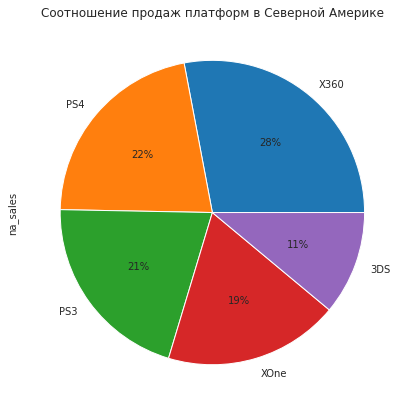

In [36]:
#Рассмотрим наиболее популярные платформы в Северной Америке
df_new_sales_platform_na = df_new.pivot_table(index = 'platform', values = 'na_sales',
                                                 aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).head(5)
display('ТОП-5 платформ по продажам в Северной Америке: ', df_new_sales_platform_na)

df_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie', autopct='%1.0f%%', 
                                             title='Соотношение продаж платформ в Северной Америке', figsize=(7,7))
plt.show()

Среди платформ наиболее популярна в Северной Америке X360. 

Среди платформ, выбранных нами ранее, как потенциально прибыльные, в ТОП-5 в Северной Америке попали три из четырех - PS4, XOne и 3DS. Распределение предпочтений довольно равномерное, заметно уступает остальным только 3DS.

'ТОП-5 платформ по продажам в Европе: '

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


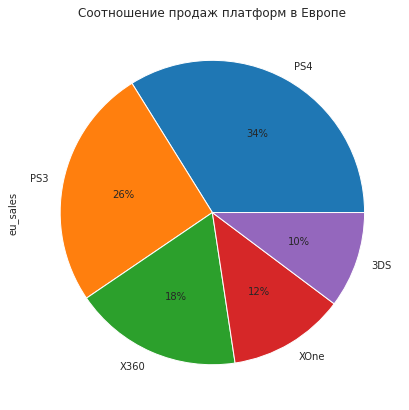

In [37]:
#Рассмотрим наиболее популярные платформы в Европе
df_new_sales_platform_eu = df_new.pivot_table(index = 'platform', values = 'eu_sales',
                                                 aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).head(5)
display('ТОП-5 платформ по продажам в Европе: ', df_new_sales_platform_eu)

df_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie', autopct='%1.0f%%', 
                                             title='Соотношение продаж платформ в Европе', figsize=(7,7))
plt.show()

Среди платформ наиболее популярна в Европе PS4. 

Среди платформ, выбранных нами ранее, как потенциально прибыльные, в ТОП-5 в Европе снова попали три из четырех - PS4, XOne и 3DS. 3DS и XOne заметно уступают остальным.

'ТОП-5 платформ по продажам в Японии: '

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


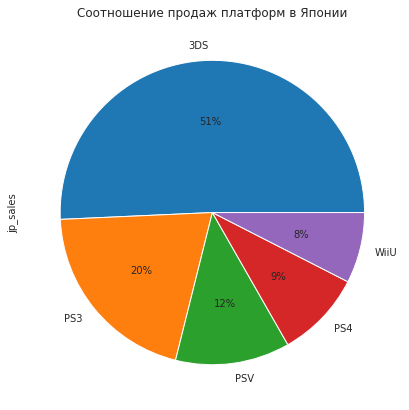

In [38]:
#Рассмотрим наиболее популярные платформы в Японии
df_new_sales_platform_jp = df_new.pivot_table(index = 'platform', values = 'jp_sales',
                                                 aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).head(5)
display('ТОП-5 платформ по продажам в Японии: ', df_new_sales_platform_jp)

df_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie', autopct='%1.0f%%', 
                                             title='Соотношение продаж платформ в Японии', figsize=(7,7))
plt.show()

Среди платформ наиболее популярна в Японии 3DS. В этом ситуация сильно отличается от Европы и Северной Америки - 3DS по продажам занимает более половины рынка. Статистика показывает, что японцы отдают предпочтение портативному варианту игровой системы.

Среди платформ, выбранных нами ранее, как потенциально прибыльные, в ТОП-5 в Японии снова попали три из четырех - PS4, XOne и 3DS. Причем, бесспорный лидер других рынков PS4 для японцев лишь на четвертом месте по популярности.

'ТОП-5 платформ по продажам в других регионах: '

,other_sales
platform,
PS4,48.35
PS3,43.26
X360,20.40
XOne,14.27
3DS,8.87


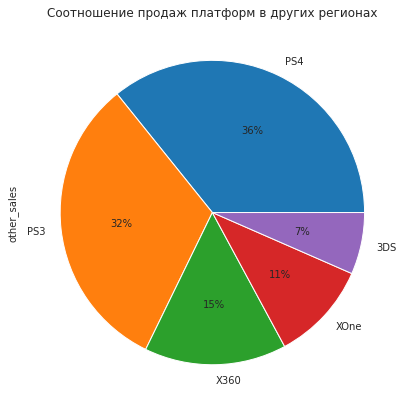

In [39]:
#Рассмотрим наиболее популярные платформы в других регионах
df_new_sales_platform_other = df_new.pivot_table(index = 'platform', values = 'other_sales',
                                                 aggfunc = 'sum').sort_values(by = 'other_sales', ascending=False).head(5)
display('ТОП-5 платформ по продажам в других регионах: ', df_new_sales_platform_other)

df_new.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie', autopct='%1.0f%%', 
                                             title='Соотношение продаж платформ в других регионах', figsize=(7,7))
plt.show()

Если рассматривать прочие регионы, PS4 снова в лидерах. Те же три из четырех, отобранных нами платформы вошли в ТОП-5.

##### Самые популярные жанры (топ-5)

'ТОП-5 платформ по продажам в Северной Америке: '

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


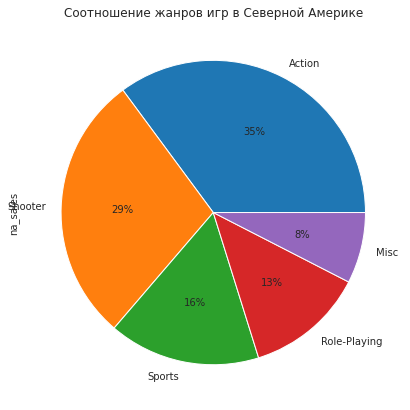

In [40]:
#Рассмотрим наиболее популярные игровые жанры в Северной Америке
df_new_sales_genre_na = df_new.pivot_table(index = 'genre', values = 'na_sales',
                                                 aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).head(5)
display('ТОП-5 платформ по продажам в Северной Америке: ', df_new_sales_genre_na)

df_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie', autopct='%1.0f%%', 
                                             title='Соотношение жанров игр в Северной Америке', figsize=(7,7))
plt.show()

Жители Северной Америки отдают предпочтение играм в жанре Action и Shooter, прочие жанры ТОПа показывают значительно меньшие результаты по продажам.

'ТОП-5 платформ по продажам в Европе: '

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


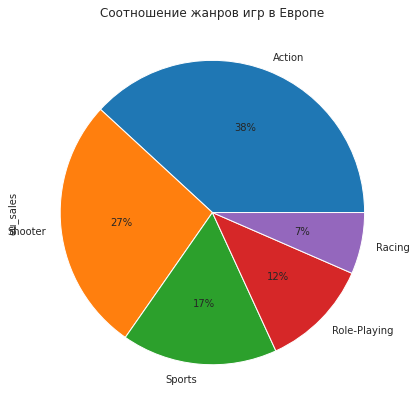

In [41]:
#Рассмотрим наиболее популярные игровые жанры в Европе
df_new_sales_genre_eu = df_new.pivot_table(index = 'genre', values = 'eu_sales',
                                                 aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).head(5)
display('ТОП-5 платформ по продажам в Европе: ', df_new_sales_genre_eu)

df_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie', autopct='%1.0f%%', 
                                             title='Соотношение жанров игр в Европе', figsize=(7,7))
plt.show()

Вкусы американцев и европейцев совпадают - в лидерах снова игры в жанре Action и Shooter, прочие жанры ТОПа показывают значительно меньшие результаты по продажам.

'ТОП-5 платформ по продажам в Японии: '

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


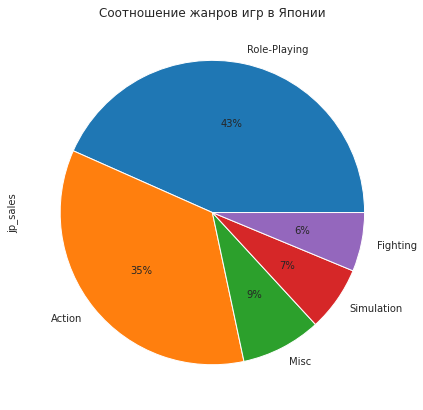

In [42]:
#Рассмотрим наиболее популярные игровые жанры в Японии
df_new_sales_genre_jp = df_new.pivot_table(index = 'genre', values = 'jp_sales',
                                                 aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).head(5)
display('ТОП-5 платформ по продажам в Японии: ', df_new_sales_genre_jp)

df_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie', autopct='%1.0f%%', 
                                             title='Соотношение жанров игр в Японии', figsize=(7,7))
plt.show()

Предпочтения японцев сильно отличаются от Европы и Северной Америки - почти половину рынка занимают Role-Playing игры, на втором месте Action, а жанр Shooter вообще не попал в ТОП-5.

'ТОП-5 платформ по продажам в других регионах: '

,other_sales
genre,
Action,51.14
Shooter,37.26
Sports,22.44
Role-Playing,14.83
Misc,7.67


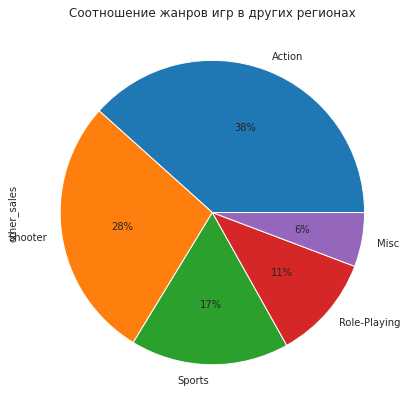

In [43]:
#Рассмотрим наиболее популярные игровые жанры в других регионах
df_new_sales_genre_other = df_new.pivot_table(index = 'genre', values = 'other_sales',
                                                 aggfunc = 'sum').sort_values(by = 'other_sales', ascending=False).head(5)
display('ТОП-5 платформ по продажам в других регионах: ', df_new_sales_genre_other)

df_new.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5).plot(kind = 'pie', autopct='%1.0f%%', 
                                             title='Соотношение жанров игр в других регионах', figsize=(7,7))
plt.show()

Прочие регионы больше сходятся по вкусах с Европой и Северной Америкой - в лидерах игры в жанре Action и Shooter, прочие жанры ТОПа показывают значительно меньшие результаты по продажам.

Значительные различия в предпочтениях японцев по сравнению с жителям Северной Америки и Европы можно объяснить языковым барьером - значительное количество жителей Европы говорят на английском (по сравнению с владением японским языком). Локализация игр стоит больших денег, а английский является универсальным языком.

Вероятно, японский рынок, известный своими многочисленными популярными Role-Playing играми просто не вкладывает средства в переводы на другие языки, тем самым, часть их продуктов не получает новых пользователей в других регионах.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

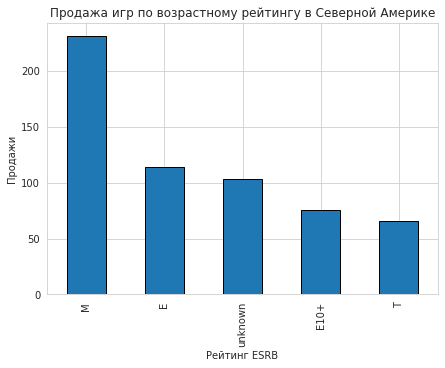

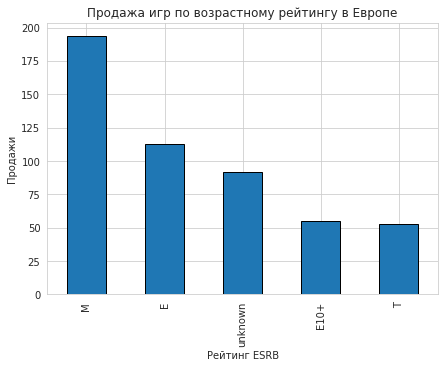

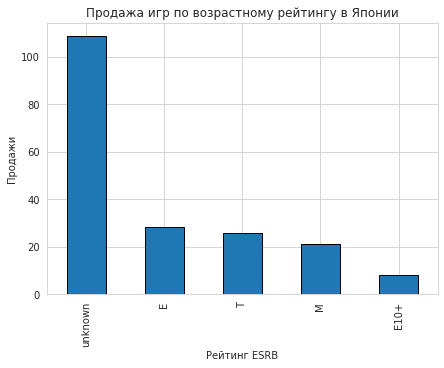

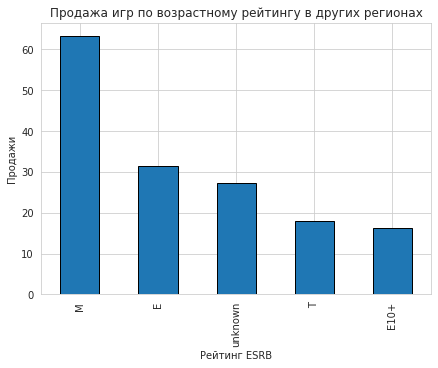

In [44]:
#Рассмотрим продажи по возрастному рейтингу
df_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', ec='black',
                                             title='Продажа игр по возрастному рейтингу в Северной Америке', figsize=(7,5))
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

df_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', ec='black',
                                             title='Продажа игр по возрастному рейтингу в Европе', figsize=(7,5))
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

df_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', ec='black',
                                             title='Продажа игр по возрастному рейтингу в Японии', figsize=(7,5))
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

df_new.groupby('rating')['other_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', ec='black',
                                             title='Продажа игр по возрастному рейтингу в других регионах', figsize=(7,5))
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

По всем регионам, кроме Японии наиболее часто покупаемыми играми являются игры с возрастным рейтингом М - для взрослых.

В Японии продажи игр с неизвестным рейтингом превышают другие в несколько раз - на эти данные не стоит полагаться, т.к. сама по себе организация ESRB предназначена для определения рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Меньше всего продаж по рейтингам Е10+ (от 10 лет) и Т (для подростков). В Японии Е10+ и М. 

##### Выводы

- Пользователь в Северной Америке предпочитает следующие платформы (в порядке убывания интереса): X360, PS4, PS3, XOne, 3DS, выбирает игры с возрастным рейтингом М, в следующих жанрах (в порядке убывания интереса): Action, Shooter, Sports, Role-Playing, Misc.


- Пользователь в Европе предпочитает следующие платформы (в порядке убывания интереса): PS4, PS3, X360, XOne, 3DS, выбирает игры с возрастным рейтингом М, в следующих жанрах (в порядке убывания интереса): Action, Shooter, Sports, Role-Playing, Racing.


- Пользователь в Японии предпочитает следующие платформы (в порядке убывания интереса): 3DS (более половины рынка), PS3, PSV, PS4, WiiU, выбирает игры в следующих жанрах (в порядке убывания интереса): Role-Playing, Action, Misc, Simulation, Fighting. Возрастной рейтинг доподлинно неизвестен, имеющиеся данные по ESRB не подходят для оценки этого региона.


- Пользователь других регионов предпочитает следующие платформы (в порядке убывания интереса): PS4, PS3, X360, XOne, 3DS - совпадает с пользователем из Европы, выбирает игры с возрастным рейтингом М, в следующих жанрах (в порядке убывания интереса): Action, Shooter, Sports, Role-Playing, Misc, что совпадает с пользователем из Северной Америки.

#### Шаг 5. Проверка гипотез
<a id='hypothesis'></a>

##### Верно ли, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы?

Формулируем гипотезу:

**Нулевая гипотеза Н0** - средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

**Альтернативная гипотеза Н1** (двусторонняя) - средние пользовательские рейтинги платформ Xbox One и PC разные.

Проверим гипотезу. Применим T-критерий Стьюдента – он подходит для сравнения параметров из двух разных выборок, по его результатам мы можем сделать вывод о сходстве или различии анализируемых объектов.

In [45]:
#Проверяем гипотезу
xone = df_new[df_new['platform'] == 'XOne']
pc = df_new[df_new['platform'] == 'PC']

user_score_xone = xone['user_score']
user_score_pc = pc['user_score']

alpha = 0.05
results = st.ttest_ind(user_score_xone, user_score_pc)

display('P-value: ', results.pvalue)

if results.pvalue<alpha:
    display('Отвергаем нулевую гипотезу Н0')
else:
    display('Нет оснований отвергать нулевую гипотезу Н0')

'P-value: '

0.05605440473353122

'Нет оснований отвергать нулевую гипотезу Н0'

##### Верно ли, что средние пользовательские рейтинги жанров Action и Sports разные?

Формулируем гипотезу:

**Нулевая гипотеза Н0** - средние пользовательские рейтинги жанров Action и Sports разные.

**Альтернативная гипотеза Н1** (двусторонняя) - средние пользовательские рейтинги жанров Action и Sports не отличаются.

Проверим гипотезу. Применим T-критерий Стьюдента – он подходит для сравнения параметров из двух разных выборок, по его результатам мы можем сделать вывод о сходстве или различии анализируемых объектов.

In [46]:
#Проверяем гипотезу
action = df_new[df_new['genre'] == 'Action']
sports = df_new[df_new['genre'] == 'Sports']

user_score_action = action['user_score']
user_score_sports = sports['user_score']

alpha = 0.05
results = st.ttest_ind(user_score_action, user_score_sports)

display('P-value: ', results.pvalue)

if results.pvalue<alpha:
    display('Отвергаем нулевую гипотезу Н0')
else:
    display('Нет оснований отвергать нулевую гипотезу Н0')

'P-value: '

0.0069555635642656

'Отвергаем нулевую гипотезу Н0'

##### Выводы

- Верно ли, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы? Ответ:

Да, опровергнуть гипотезу не удалось. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.


- Верно ли, что средние пользовательские рейтинги жанров Action и Sports разные? Ответ:

Нет, гипотеза опровергнута, средние пользовательские рейтинги жанров Action и Sports одинаковы.

#### Шаг 6. Общие выводы
<a id='conclusion'></a>

1. Датасет содержит достаточный для исследования набор данных, серьезная предобработка не потребовалась.

- В данных есть пропуски, особенно значительное количество в столбцах Critic_Score, User_Score и Rating. Вероятная причина - разные системы оценок в разных странах, отсутствие данных по регионам, а также само существование какой бы то ни было системы оценок на момент выхода игры. Или обратная ситуация - игра совсем новая и еще не была оценена игроками и критиками. Что касается возрастного рейтинга (столбец Rating) - т.к. взяты данные от организации ESRB, оценить по нему японский рынок не удалось, данная классификация не распространяется на японские игры.

- Рекомендуется для дальнейших исследований подключить дополнительные источники оценок пользователей и критиков и другие рейтинговые организации.

2. Рассмотрены данные с 1980 года по 2016.

- Наблюдается ежегодный рост числа выпущенных игр вплоть до начала 2010 года. С начала 2010 года рост остановился, с 2012 ежегодный выпуск стабилизировался на уровне 500-650 игр.

- Наиболее популярная за всремя время исследований платформа - PS2, но на момент исследования она уже неактуальна.

- Опредлено, что **платформы остаются популярными не более 5-7 лет подряд**.

- Определен **средний жизненный цикл платформы - 11 лет**.

3.  **Период, на основании которого строится прогноз на 2017 год - это период с 2012 по 2016 г.** Диапазон взят с учетом срока популярности платформ, среднего жизненного цикла платформ, устаревшие данные намеренно отрезаны, т.к. в условиях столь динамично меняющейся сферы, опираться на них было бы некорректно. Все дальнейшие выводы сделаны на основании отобранных данных.

4. Все рассмотренные платформы имеют тенденцию к спаду продаж к моменту наблюдения.

5. В **ТОП-5 по количеству выпущенных игр** попали игры в жанрах Action (лидер с большим отрывом), Role-Playing, Adventure, Sports и Shooter. На последнем месте по количеству игр - жанр Puzzle. При этом данные разнятся по регионам, об этом далее.

6. В **ТОП-5 по количеству проданных копий** попали игры в жанрах Action, Shooter, Role-Playing, Sports и Misc. Следует обратить внимание на то, что несмотря на высокое количество выпущенных игр в жанре Adventure, эти игры далеки от ТОПа по продажам.На последнем месте по количеству проданных копий - жанр Puzzle. При этом данные разнятся по регионам, об этом далее.

- При рассмотрении распределения уровня продаж по жанрам, обнаружено, что несмотря на то, что жанр Shooter занимает второе место ТОПа с заметным отрывом от лидера, он, тем не менее, имеет наиболее высокое нормальное распределение продаж. Это значит, что несмотря на то, что суммарно жанр приносит меньше лидера, он куда более стабилен при прогнозировании. Следует выделить этот жанр как "стабильно приносящий высокий доход".

7. Сформированы **портреты пользователей по регионам**: <a id='users_portaits'></a>

- Пользователь в **Северной Америке** предпочитает следующие платформы (в порядке убывания интереса): X360, PS4, PS3, XOne, 3DS, выбирает игры с возрастным рейтингом М, в следующих жанрах (в порядке убывания интереса): Action, Shooter, Sports, Role-Playing, Misc.


- Пользователь в **Европе** предпочитает следующие платформы (в порядке убывания интереса): PS4, PS3, X360, XOne, 3DS, выбирает игры с возрастным рейтингом М, в следующих жанрах (в порядке убывания интереса): Action, Shooter, Sports, Role-Playing, Racing.


- Пользователь в **Японии** предпочитает следующие платформы (в порядке убывания интереса): 3DS (более половины рынка), PS3, PSV, PS4, WiiU, выбирает игры в следующих жанрах (в порядке убывания интереса): Role-Playing, Action, Misc, Simulation, Fighting. Возрастной рейтинг доподлинно неизвестен, имеющиеся данные по ESRB не подходят для оценки этого региона.


- Пользователь **других регионов** предпочитает следующие платформы (в порядке убывания интереса): PS4, PS3, X360, XOne, 3DS - совпадает с пользователем из Европы, выбирает игры с возрастным рейтингом М, в следующих жанрах (в порядке убывания интереса): Action, Shooter, Sports, Role-Playing, Misc, что совпадает с пользователем из Северной Америки.


8. Проверены гипотезы:

- Верно ли, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы? Ответ:
Да, опровергнуть гипотезу не удалось. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.


- Верно ли, что средние пользовательские рейтинги жанров Action и Sports разные? Ответ:
Нет, гипотеза опровергнута, средние пользовательские рейтинги жанров Action и Sports одинаковы.



**Общие рекомендации:**

- **Рекомендуется для дальнейших исследований подключить дополнительные источники** оценок пользователей и критиков и другие рейтинговые организации.

**Рекомендации для формирования маркетинговой кампании на 2017 год:** 

1. Использовать разные стратегии для разных регионов:

   1.1. *Платформы*

- **Для рынков Европы, Северной Америки и других регионов, кроме Японии** рекомендуется опираться на платформы **PS4 и XOne**. 3DS может рассматриваться как **дополнительный вариант** для расширения рекламной кампании, т.к. отличается от лидеров по принципу использования - **3DS среди лидеров является единственной портативной приставкой**.

- **Для рынка Японии** рекомендуется опираться на платформу **3DS.**

- **РС** не вошел ни в один ТОП-5 по популярности по регионам, но его стоит рассматривать как **расширение маркетинговой стратегии ввиду особенности и уникальности его типа**. 

   1.2. *Жанры игр*
   
- **Для рынков Европы, Северной Америки и других регионов, кроме Японии** рекомендуется рассматривать жанры Action и Shooter, причем принять во внимание, что Shooter более стабилен по продажам, он с большей вероятностью даст хорошую отдачу, по сравнению с Action.

- **Для рынка Японии** рекомендуется опираться на жанр **Role-Playing.**

- Варианты для расширения маркетинговой стратегии рекомендовано взять из сформированных портретов пользователей [(п.7 Общих выводов)](#users_portaits).

2. **Следует учитывать мнение критиков об игре - их оценки оказывают сильное влияние на продажи**.

3. Отзывы пользователей оказали среднее влияние на продажи **только одной из интересующих нас платформ - 3DS**, но мнение критиков все равно влияет сильнее. В остальном можно **не учитывать мнение пользователей** при планировании рекламной кампании.